Nama : Muammar Ahlan Abimanyu  
NIM : H071191032

In [7]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing data

In [8]:
# read dataset
df = pd.read_csv('top500mangaMAL.csv')

# show data
df.head()

,Manga ID,Manga URL,English Title,Synonims Titles,Japanese Title,Type,Volumes,Chapters,Status,Published,Published Dates,Genres,Author,Serialization,Score,Ranked,Popularity,Members,Favorites,Score Voted By
0,2,https://myanimelist.net/manga/2/Berserk,Berserk,Berserk: The Prototype,ベルセルク,Manga,Unknown,Unknown,Publishing,"Aug 25, 1989 to ?","{'from': '1989-08-25', 'to': 'Unknown'}","['Action', 'Adventure', 'Demons', 'Drama', 'Fa...","['Miura, Kentarou (Story & Art)']",Young Animal,9.33,1,4,296958,61992,139571
1,1706,https://myanimelist.net/manga/1706/JoJo_no_Kim...,Unknown,JoJo's Bizarre Adventure Part 7: Steel Ball Ru...,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,Manga,24,96,Finished,"Jan 19, 2004 to Apr 19, 2011","{'from': '2004-01-19', 'to': '2011-04-19'}","['Action', 'Adventure', 'Mystery', 'Historical...","['Araki, Hirohiko (Story & Art)']",Ultra Jump,9.21,2,50,97073,18083,54901
2,25,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,"Full Metal Alchemist, Hagane no Renkinjutsushi...",鋼の錬金術師,Manga,27,116,Finished,"Jul 12, 2001 to Sep 11, 2010","{'from': '2001-07-12', 'to': '2010-09-11'}","['Action', 'Adventure', 'Comedy', 'Drama', 'Sh...","['Arakawa, Hiromu (Story & Art)']",Shounen Gangan,9.12,3,11,197562,26386,110885
3,13,https://myanimelist.net/manga/13/One_Piece,One Piece,Unknown,ONE PIECE,Manga,Unknown,Unknown,Publishing,"Jul 22, 1997 to ?","{'from': '1997-07-22', 'to': 'Unknown'}","['Action', 'Adventure', 'Comedy', 'Fantasy', '...","['Oda, Eiichiro (Story & Art)']",Shounen Jump (Weekly),9.08,4,2,306944,75106,185560
4,1,https://myanimelist.net/manga/1/Monster,Monster,Unknown,MONSTER,Manga,18,162,Finished,"Dec 5, 1994 to Dec 20, 2001","{'from': '1994-12-05', 'to': '2001-12-20'}","['Mystery', 'Drama', 'Psychological', 'Seinen']","['Urasawa, Naoki (Story & Art)']",Big Comic Original,9.07,5,39,103030,10000,41412


In [9]:
# remove unneceessary attribute
df = df[['Score', 'Members', 'Favorites', 'Score Voted By']]

# show refactored dataset
df.head()

,Score,Members,Favorites,Score Voted By
0,9.33,296958,61992,139571
1,9.21,97073,18083,54901
2,9.12,197562,26386,110885
3,9.08,306944,75106,185560
4,9.07,103030,10000,41412


In [10]:
from sklearn.preprocessing import StandardScaler
df_scale = df[['Score', 'Members', 'Favorites', 'Score Voted By']]

# initialize the scaler
scaler = StandardScaler()

# fit and transform
df_scale = scaler.fit_transform(df_scale)
df_scale.shape

(500, 4)

In [11]:
df_scale[:5]

array([[ 4.38693005,  5.93442313,  9.68045905,  5.48777666],
       [ 3.83929397,  1.42307884,  2.50569945,  1.7687256 ],
       [ 3.42856692,  3.69108532,  3.86241514,  4.22777077],
       [ 3.24602156,  6.15980414, 11.82329531,  7.50780075],
       [ 3.20038522,  1.55752653,  1.18493192,  1.17623381]])

In [12]:
data = pd.DataFrame(df_scale)
data.columns = ['Score', 'Members', 'Favorites', 'Scored Voted By']

data_cluster = data.copy()
data.head()

,Score,Members,Favorites,Scored Voted By
0,4.386930,5.934423,9.680459,5.487777
1,3.839294,1.423079,2.505699,1.768726
2,3.428567,3.691085,3.862415,4.227771
3,3.246022,6.159804,11.823295,7.507801
4,3.200385,1.557527,1.184932,1.176234


In [13]:
data.describe()

,Score,Members,Favorites,Scored Voted By
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,-7.213785e-15,3.808065e-17,-4.996004e-17,9.314771e-17
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-1.180703e+00,-7.553034e-01,-4.467871e-01,-6.331304e-01
25%,-7.699763e-01,-5.840784e-01,-4.014842e-01,-5.334557e-01
50%,-2.223402e-01,-3.725777e-01,-3.255438e-01,-3.753181e-01
75%,5.078412e-01,1.712618e-01,-2.562188e-02,1.029162e-01
max,4.386930e+00,6.278047e+00,1.182330e+01,7.507801e+00


# K-Means

Text(0, 0.5, 'Inertia')

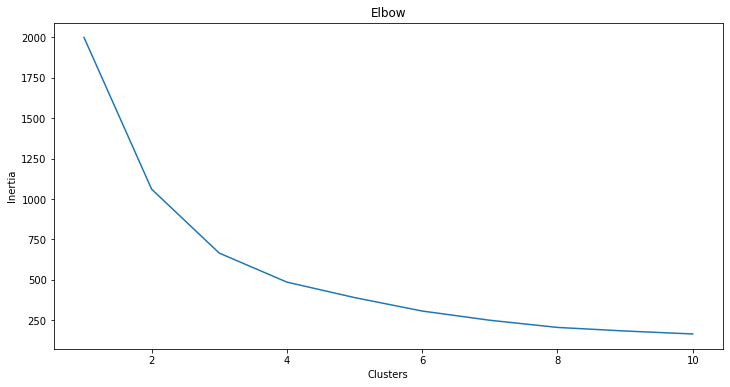

In [14]:
from sklearn.cluster import KMeans

# create list data
clusters = []
for i in range(1,11) :
  km = KMeans(n_clusters=i).fit(data)
  clusters.append(km.inertia_)

# show plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [15]:
# create model
model_kmeans3 = KMeans(n_clusters=3)
model_kmeans4 = KMeans(n_clusters=4)

# train model
model_kmeans3.fit(data)
model_kmeans4.fit(data)

# add label to data
data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster['cluster_kmeans4'] = model_kmeans4.labels_

data_cluster

,Score,Members,Favorites,Scored Voted By,cluster_kmeans3,cluster_kmeans4
0,4.386930,5.934423,9.680459,5.487777,2,1
1,3.839294,1.423079,2.505699,1.768726,0,2
2,3.428567,3.691085,3.862415,4.227771,2,1
3,3.246022,6.159804,11.823295,7.507801,2,1
4,3.200385,1.557527,1.184932,1.176234,0,2
...,...,...,...,...,...,...
495,-1.135067,-0.694027,-0.438454,-0.617493,1,0
496,-1.135067,-0.250126,-0.343518,-0.268824,1,0
497,-1.180703,-0.742935,-0.432735,-0.628474,1,0
498,-1.180703,1.196660,0.308614,1.114872,0,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


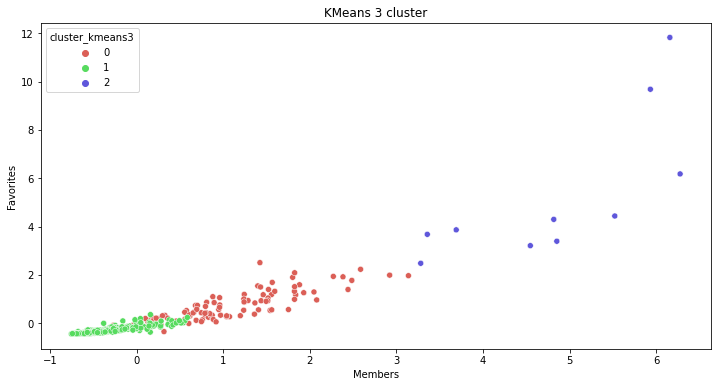

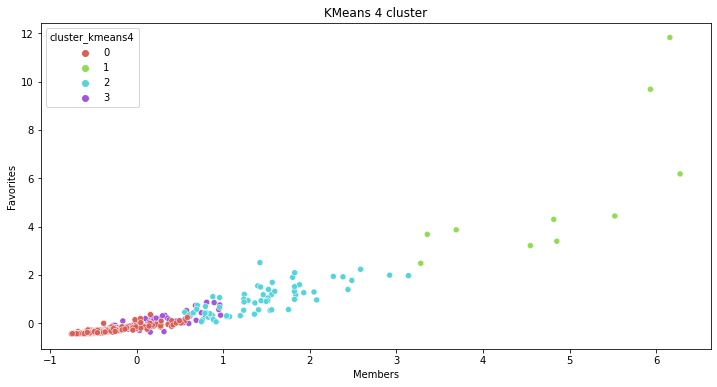

In [16]:
# show plot
plt.figure(figsize=(12,6))
sns.scatterplot(data_cluster['Members'], data_cluster['Favorites'], hue=data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls', 3))
plt.title('KMeans 3 cluster')

plt.figure(figsize=(12,6))
sns.scatterplot(data_cluster['Members'], data_cluster['Favorites'], hue=data_cluster['cluster_kmeans4'], palette=sns.color_palette('hls', 4))
plt.title('KMeans 4 cluster')

plt.show()

# K-Medoids

In [17]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

In [18]:
model_kmedoids = KMedoids(n_clusters=4, random_state=0)
model_kmedoids.fit(data)

data_cluster['Cluster K-Medoids'] = model_kmedoids.labels_
data_cluster

,Score,Members,Favorites,Scored Voted By,cluster_kmeans3,cluster_kmeans4,Cluster K-Medoids
0,4.386930,5.934423,9.680459,5.487777,2,1,3
1,3.839294,1.423079,2.505699,1.768726,0,2,3
2,3.428567,3.691085,3.862415,4.227771,2,1,3
3,3.246022,6.159804,11.823295,7.507801,2,1,3
4,3.200385,1.557527,1.184932,1.176234,0,2,3
...,...,...,...,...,...,...,...
495,-1.135067,-0.694027,-0.438454,-0.617493,1,0,1
496,-1.135067,-0.250126,-0.343518,-0.268824,1,0,1
497,-1.180703,-0.742935,-0.432735,-0.628474,1,0,1
498,-1.180703,1.196660,0.308614,1.114872,0,2,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


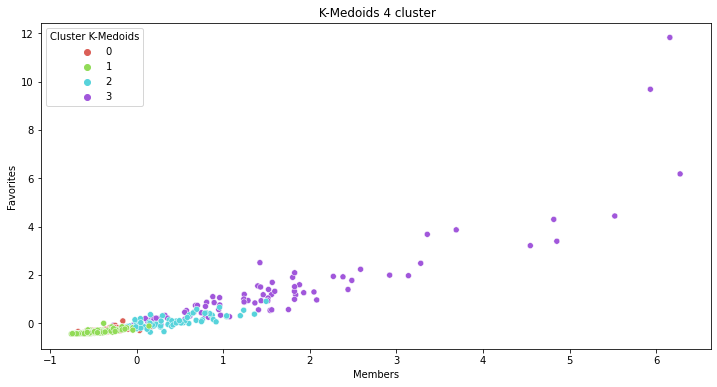

In [36]:
plt.figure(figsize=(12,6))
sns.scatterplot(data_cluster['Members'], data_cluster['Favorites'], hue=data_cluster['Cluster K-Medoids'], palette=sns.color_palette('hls', 4))
plt.title(' K-Medoids 4 cluster')
plt.show()

# Hierarchy

In [19]:
data

,Score,Members,Favorites,Scored Voted By
0,4.386930,5.934423,9.680459,5.487777
1,3.839294,1.423079,2.505699,1.768726
2,3.428567,3.691085,3.862415,4.227771
3,3.246022,6.159804,11.823295,7.507801
4,3.200385,1.557527,1.184932,1.176234
...,...,...,...,...
495,-1.135067,-0.694027,-0.438454,-0.617493
496,-1.135067,-0.250126,-0.343518,-0.268824
497,-1.180703,-0.742935,-0.432735,-0.628474
498,-1.180703,1.196660,0.308614,1.114872


In [20]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

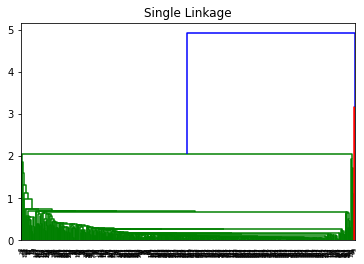

In [21]:
# single linkage
mergings_single = linkage(data, method="single", metric="euclidean")
dendrogram(mergings_single)
plt.title("Single Linkage")
plt.show()

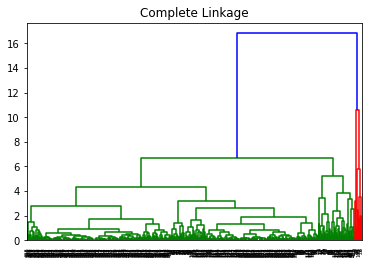

In [22]:
# complete linkage
mergings_complete = linkage(data, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.title("Complete Linkage")
plt.show()

In [23]:
# 3 clusters
cluster_hierarchy = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_hierarchy

array([0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [24]:
# assign cluster labels
data_cluster['cluster_hierarchy'] = cluster_hierarchy
data_cluster

,Score,Members,Favorites,Scored Voted By,cluster_kmeans3,cluster_kmeans4,Cluster K-Medoids,cluster_hierarchy
0,4.386930,5.934423,9.680459,5.487777,2,1,3,0
1,3.839294,1.423079,2.505699,1.768726,0,2,3,1
2,3.428567,3.691085,3.862415,4.227771,2,1,3,2
3,3.246022,6.159804,11.823295,7.507801,2,1,3,0
4,3.200385,1.557527,1.184932,1.176234,0,2,3,1
...,...,...,...,...,...,...,...,...
495,-1.135067,-0.694027,-0.438454,-0.617493,1,0,1,1
496,-1.135067,-0.250126,-0.343518,-0.268824,1,0,1,1
497,-1.180703,-0.742935,-0.432735,-0.628474,1,0,1,1
498,-1.180703,1.196660,0.308614,1.114872,0,2,2,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Hierarchical Clustering')

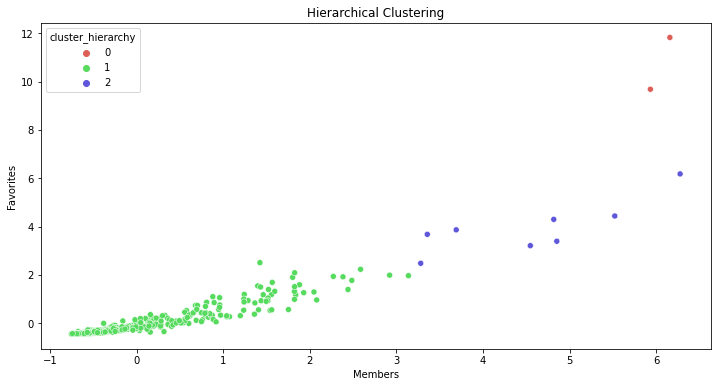

In [38]:
# show plot
plt.figure(figsize=(12,6))
sns.scatterplot(data_cluster['Members'], data_cluster['Favorites'], hue=data_cluster['cluster_hierarchy'], palette=sns.color_palette('hls',3))
plt.title('Hierarchical Clustering')

# DBSCAN

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
data

,Score,Members,Favorites,Scored Voted By
0,4.386930,5.934423,9.680459,5.487777
1,3.839294,1.423079,2.505699,1.768726
2,3.428567,3.691085,3.862415,4.227771
3,3.246022,6.159804,11.823295,7.507801
4,3.200385,1.557527,1.184932,1.176234
...,...,...,...,...
495,-1.135067,-0.694027,-0.438454,-0.617493
496,-1.135067,-0.250126,-0.343518,-0.268824
497,-1.180703,-0.742935,-0.432735,-0.628474
498,-1.180703,1.196660,0.308614,1.114872


In [28]:
# create an object
db = DBSCAN(eps=0.7, min_samples=5, metric='euclidean')

# fit the model
db.fit(data)

DBSCAN(eps=0.7)

In [29]:
# assign cluster labels
data_cluster['cluster_dbscan'] = db.labels_
data_cluster

,Score,Members,Favorites,Scored Voted By,cluster_kmeans3,cluster_kmeans4,Cluster K-Medoids,cluster_hierarchy,cluster_dbscan
0,4.386930,5.934423,9.680459,5.487777,2,1,3,0,-1
1,3.839294,1.423079,2.505699,1.768726,0,2,3,1,-1
2,3.428567,3.691085,3.862415,4.227771,2,1,3,2,-1
3,3.246022,6.159804,11.823295,7.507801,2,1,3,0,-1
4,3.200385,1.557527,1.184932,1.176234,0,2,3,1,0
...,...,...,...,...,...,...,...,...,...
495,-1.135067,-0.694027,-0.438454,-0.617493,1,0,1,1,1
496,-1.135067,-0.250126,-0.343518,-0.268824,1,0,1,1,1
497,-1.180703,-0.742935,-0.432735,-0.628474,1,0,1,1,1
498,-1.180703,1.196660,0.308614,1.114872,0,2,2,1,1


In [30]:
data_cluster.describe()

,Score,Members,Favorites,Scored Voted By,cluster_kmeans3,cluster_kmeans4,Cluster K-Medoids,cluster_hierarchy,cluster_dbscan
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,500.000000,500.00000,500.000000,500.000000
mean,-7.213785e-15,3.808065e-17,-4.996004e-17,9.314771e-17,0.818000,0.916000,1.17200,1.012000,0.912000
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,0.435034,1.269712,1.06239,0.141052,0.434319
min,-1.180703e+00,-7.553034e-01,-4.467871e-01,-6.331304e-01,0.000000,0.000000,0.00000,0.000000,-1.000000
25%,-7.699763e-01,-5.840784e-01,-4.014842e-01,-5.334557e-01,1.000000,0.000000,0.00000,1.000000,1.000000
50%,-2.223402e-01,-3.725777e-01,-3.255438e-01,-3.753181e-01,1.000000,0.000000,1.00000,1.000000,1.000000
75%,5.078412e-01,1.712618e-01,-2.562188e-02,1.029162e-01,1.000000,2.000000,2.00000,1.000000,1.000000
max,4.386930e+00,6.278047e+00,1.182330e+01,7.507801e+00,2.000000,3.000000,3.00000,2.000000,2.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'DBSCAN clustering')

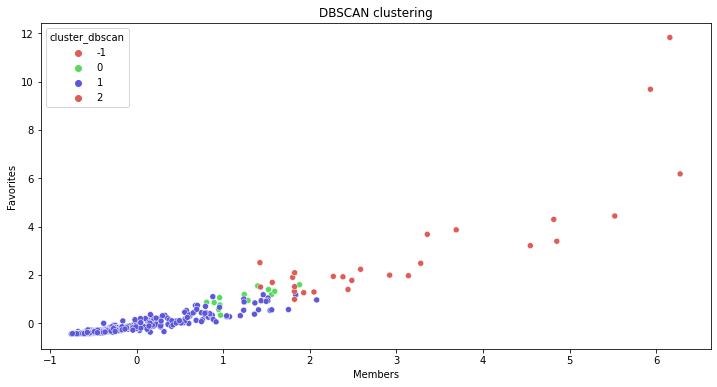

In [31]:
# show plot
plt.figure(figsize=(12,6))
sns.scatterplot(data_cluster['Members'], data_cluster['Favorites'], hue=data_cluster['cluster_dbscan'], palette=sns.color_palette('hls', as_cmap=True))
plt.title('DBSCAN clustering')